# Polynomial Regression


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [2]:
df =pd.read_csv('D:\Coursera courses\ML with python\simple linear regression\FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [3]:
mask = np.random.rand(len(df)) <0.8
train = df[mask]
test = df[~mask]

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_train_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v\_1\\\\\\
v\_2\\\\
\vdots\\\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
\[ 1 & v\_1 & v\_1^2]\\\\
\[ 1 & v\_2 & v\_2^2]\\\\
\vdots & \vdots & \vdots\\\\
\[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\\\
2.4\\\\
1.5\\\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
\[ 1 & 2. & 4.]\\\\
\[ 1 & 2.4 & 5.76]\\\\
\[ 1 & 1.5 & 2.25]\\\\
\vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does.
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x\_1$, $x\_1^2$ with $x\_2$, and so on. Then the 2nd degree equation would be turn into:

$$y = b + \theta\_1  x\_1 + \theta\_2 x\_2$$

Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such problems.

so we can use **LinearRegression()** function to solve it:


In [5]:
clf = linear_model.LinearRegression()
clf.fit(x_train_poly , y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 0.         49.89924855 -1.38701816]]
[108.07593748]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


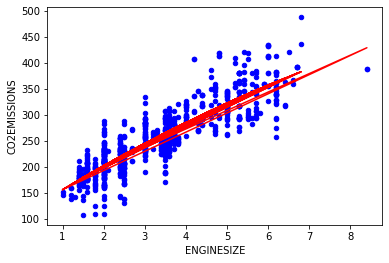

In [17]:

train.plot(kind ='scatter' , x= 'ENGINESIZE', y='CO2EMISSIONS',color ='blue')
plt.plot( train['ENGINESIZE'] , clf.predict(x_train_poly) ,color ='red')

In [21]:
print(clf.coef_ )
print(clf.intercept_)

[[ 0.         49.89924855 -1.38701816]]
[108.07593748]


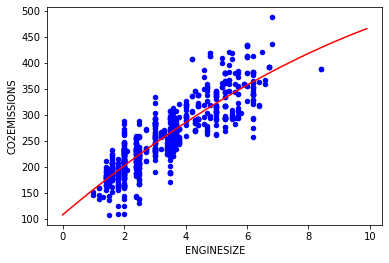

In [25]:
train.plot(kind ='scatter' , x= 'ENGINESIZE', y='CO2EMISSIONS',color ='blue')
xx= np.arange(0.0,10,0.1)
yy = clf.intercept_ +  clf.coef_[0][1]*xx + clf.coef_[0][2] * np.power(xx,2)
plt.plot(xx ,yy ,'-r')

In [20]:
from sklearn.metrics import r2_score 

x_test_poly =poly.fit_transform(x_test)
y_hat = clf.predict(x_test_poly)

print('Mean absolute error %.2f' % np.mean(np.absolute(y_hat - y_test)))

print('Mean square error %.2f' % np.mean((y_hat - y_test)**2))

print('R2 =  %.2f' % r2_score(y_test , y_hat))

Mean absolute error 22.15
Mean square error 820.86
R2 =  0.77


Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [26]:
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
# deal with polynomial as multi linear regression 
r= linear_model.LinearRegression()
r.fit(x_train_poly , y_train)
yhat = r.predict(x_test_poly)

In [27]:
r.coef_

array([[ 0.        , 25.18159073,  5.36460078, -0.55509162]])

In [28]:
r.intercept_

array([134.5445428])

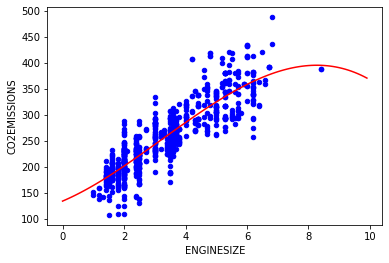

In [31]:
train.plot(kind ='scatter', x='ENGINESIZE' ,y ='CO2EMISSIONS', color ='blue')
xx =np.arange(0.0 ,10 ,0.1)
yy= r.intercept_ + r.coef_[0][1] *xx + r.coef_[0][2] *(xx**2) + r.coef_[0][3] *(xx**3)
plt.plot(xx,yy ,'-r')

In [32]:
print('Mean absolute error %.2f' % np.mean(np.absolute(yhat - y_test)))

print('Mean square error %.2f' % np.mean((yhat - y_test)**2))

print('R2 =  %.2f' % r2_score(y_test , yhat))

Mean absolute error 22.23
Mean square error 825.67
R2 =  0.77
